# **Algoritmo Quick-Find**

Utilizamos la libreria graphviz y la funcion drawUF(lista de ids) para visualizar que nodos estan conectados (los que tienen el mismo id).

In [1]:
import graphviz as gv

#Generamos el Grafo
def drawUF(a):  #a es una Lista de Nodos (Arreglo de Nodos)
    dot = gv.Digraph(comment='Nada')
    n = len(a)
    for i in range(n): #Creamos Nodos a partir de los elementos de una Lista
        dot.node(str(i), str(i))
    for i in range(n): #Creamos Aristas
        if i != a[i]: #Si el indice es != al Valor (Padre) construimos la aristas (con esto solo evitamos dibujar aristas al mismo nodo: lazo)
            dot.edge(str(i), str(a[i]))
    dot.graph_attr['rankdir'] = 'BT'  #Dibuja el Grafo, como una estructura "Binary Tree"(BT), con una "Raiz"
    return dot

Definimos un arreglo de id[0, 0, 9, 9, 9, 6, 6, 7, 8, 9] y lo visualizamos a traves de la función drawUF  Recordar que igual id significa que son componentes conexos dentro del conjunto.

// Nada
digraph {
	graph [rankdir=BT]
	0 [label=0]
	1 [label=1]
	2 [label=2]
	3 [label=3]
	4 [label=4]
	5 [label=5]
	6 [label=6]
	7 [label=7]
	8 [label=8]
	9 [label=9]
	1 -> 0
	2 -> 9
	3 -> 9
	4 -> 9
	5 -> 6
}



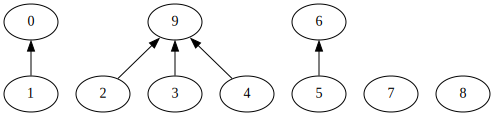

In [2]:
#Generamos el Grafo con Graphviz y un conjunto de Nodos y Aristas
# Tener en cuenta que: 
# - El Arreglo representa los id[i]
# - Los Vertices o Nodos son los indices del Arreglo o sea "i"
dot = drawUF([0, 0, 9, 9, 9, 6, 6, 7, 8, 9]) # Padres de los Indices
#Mostramos el Grafo como estructura de nodos y aristas
print(dot)
#Mostramos la Figura del Grafo
#gv.Source(dot)
dot

Definimos la funcion quickfind, la cual recibe un arreglo de ids y un elemento a buscar en el.

In [3]:
#Obtenemos el Padre del Componente
def quickfind(s, a): #s:Lista(Arreglo), a:índice
    return s[a] #Retorna el elemento de la Lista(Arreglo) "s" en el índice(posición) "a"

Probamos Quick Find

In [4]:
#Probamos QuickFind
lista = [0, 0, 9, 9, 9, 6, 6, 7, 8, 9]
print(quickfind(lista, 7))

7


Definimos la funcion qf_union(), que recibe un arreglo de ids y une los componentes a y b (asigna el id del elemento b a todos los elementos que tengan el mismo id del elemento a)

In [5]:
def qf_union(s, a, b):  #s:Lista(Arreglo), a,b:índices (componentes del Grafo)
    pa = quickfind(s, a)  #Obtenemos el Padre de "a" #pa=9
    pb = quickfind(s, b)  #Obtenemos el Padre de "b" #pb=6
    for i in range(len(s)): #Recorremos todo el Arreglo (Lista)
        if s[i] == pa: #Si el elemento(indice) evaluado tiene el padre "pa"
            s[i] = pb #Le asigna el padre "pb", debido al UNION | asigna el id del elemento b a todos los elementos que tengan el mismo id del elemento a

Probamos conectar 10 elementos

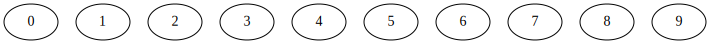

In [6]:
s = [i for i in range(10)] #Generamos una Lista de 10 enteros
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 3 y 4 del arreglo **s**.  La funcion qf_union() cambia los id del componente 3 por el id del componente 4.

[0, 1, 2, 4, 4, 5, 6, 7, 8, 9]


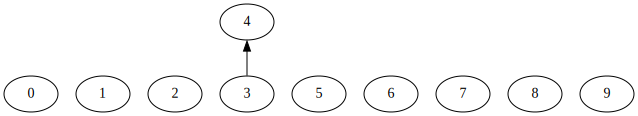

In [7]:
qf_union(s, 3, 4)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 4 y 9 del arreglo **s**. La funcion qf_union() cambia los id del componente 4 por el id del componente 9.

[0, 1, 2, 9, 9, 5, 6, 7, 8, 9]


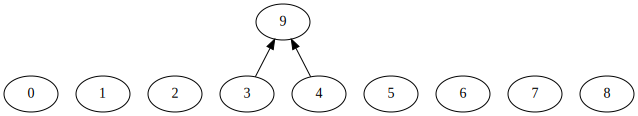

In [19]:
qf_union(s, 4, 9)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 8 y 0 del arreglo **s**.  La funcion qf_union() cambia los id del componente 8 por el id del componente 0.

[0, 1, 2, 9, 9, 5, 6, 7, 0, 9]


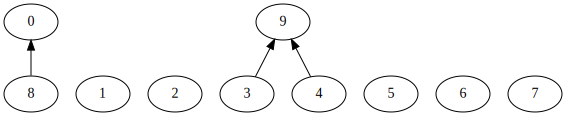

In [20]:
qf_union(s, 8, 0)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 2 y 3 del arreglo **s**. La funcion qf_union() cambia los id del componente 2 por el id del componente 3.

[0, 1, 9, 9, 9, 5, 6, 7, 0, 9]


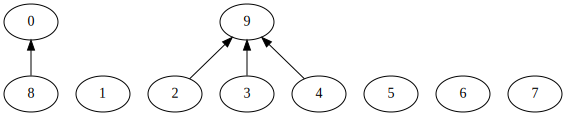

In [21]:
qf_union(s, 2, 3)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 5 y 6 del arreglo **s**. La funcion qf_union() cambia los id del componente 5 por el id del componente 6.

[0, 1, 9, 9, 9, 6, 6, 7, 0, 9]


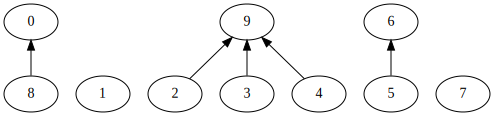

In [ ]:
qf_union(s, 5, 6)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 5 y 9 del arreglo **s**. La funcion qf_union() cambia los id del componente 5 por el id del componente 9.

[0, 1, 9, 9, 9, 9, 9, 7, 0, 9]


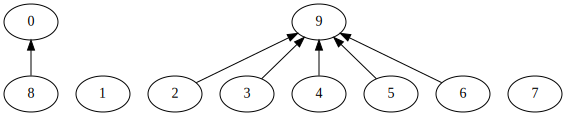

In [ ]:
qf_union(s, 5, 9)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 7 y 3 del arreglo **s**. La funcion qf_union() cambia los id del componente 7 por el id del componente 3.

[0, 1, 9, 9, 9, 9, 9, 9, 0, 9]


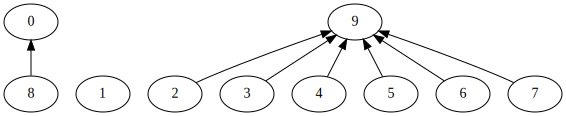

In [ ]:
qf_union(s, 7, 3)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 4 y 8 del arreglo **s**. La funcion qf_union() cambia los id del componente 4 por el id del componente 8 (todos los id = 9 por 0)

[0, 1, 0, 0, 0, 0, 0, 7, 0, 0]


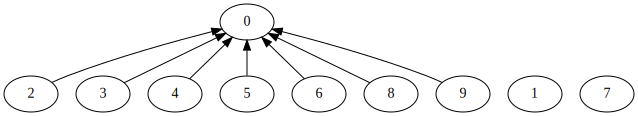

In [ ]:
qf_union(s, 4, 8)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot

Unimos los elementos 6 y 1 del arreglo **s**. La funcion qf_union() cambia los id del componente 6 por el id del componente 1 (todos los id = 0 por 1)

[1, 1, 1, 1, 1, 1, 1, 7, 1, 1]


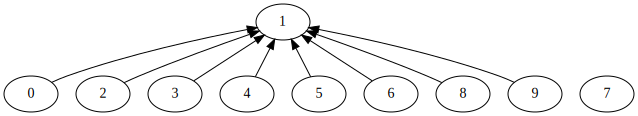

In [ ]:
qf_union(s, 6, 1)
print(s)
dot = drawUF(s)
#gv.Source(dot)
dot